<a href="https://colab.research.google.com/github/syakubson/DataScience/blob/main/PyTorch_helps/Torch_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Импорты

In [ ]:
!pip install -q torchmetrics

In [ ]:
import torch
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", "FutureWarning")
plt.style.use("dark_background")

# Для задач
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm.autonotebook import tqdm

In [32]:
# https://stackoverflow.com/questions/39719308/keras-model-creates-linear-classification-for-make-moons-data
def plot_decision_boundary(model: nn.Module) -> None:
    # установим минимальные и максимальные значения и добавим паддинг (отступы)
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.1
    # сгенерируем сетку точек, с расстоянием h между ними
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # предскажем
    model.eval() # переводим модель в режим инференса
    with torch.no_grad(): # градиент не считаем
      data = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(torch.float32)
      probs = torch.sigmoid(model(data).reshape(xx.shape))
      probs = probs.numpy().reshape(xx.shape)

    # отрисуем точки
    plt.figure(figsize=(15, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
    plt.scatter(x[100:, 0], x[100:, 1],
                c=y[100:],
                cmap="RdBu",
                s=50,
                linewidth=1,
                alpha=.42,
                ec="black")
    plt.title("Decision Boundary")
    plt.axis("off")
    plt.show()

## Torch vs Numpy

In [3]:
vec = np.array([9,8,7])
print(vec)
print(vec.shape)

[9 8 7]
(3,)


In [4]:
vec_torch = torch.from_numpy(vec) # Перевод в torch тензор
print(vec_torch)
print(vec_torch.shape)

vec_torch -= torch.from_numpy(vec)  # Отрицательный тензор становится нулевым. Изначальный массив numpy тоже
print(vec_torch)
print(vec_torch.shape)
print(vec)

tensor([9, 8, 7])
torch.Size([3])
tensor([0, 0, 0])
torch.Size([3])
[0 0 0]


In [5]:
matrix = np.array([[5,10,9], # Создание матрицы
                  [1,2,3]])
print(matrix)
print(matrix.shape)

matrix_tensor = torch.from_numpy(matrix)
print(matrix_tensor)
print(matrix_tensor.shape)

matrix_tensor.numpy()  # Перевод обратно в numpy

[[ 5 10  9]
 [ 1  2  3]]
(2, 3)
tensor([[ 5, 10,  9],
        [ 1,  2,  3]])
torch.Size([2, 3])


array([[ 5, 10,  9],
       [ 1,  2,  3]])

In [6]:
torch.rand(3,224,244).shape

torch.Size([3, 224, 244])

### Создание случайных тензоров

In [7]:
torch.tensor(np.array([0,1,2,3])).dtype # int тензор

torch.int64

In [8]:
tensor_ = torch.tensor(np.array([0,1.,2,3])) # float тензор

In [9]:
# Типы значений с плавающей точкой
print(
    torch.FloatTensor().dtype,  # 32 бита
    torch.HalfTensor().dtype,    # 16 бит
    torch.DoubleTensor().dtype,    # 64 бит
    sep ="\n"
)

torch.float32
torch.float16
torch.float64


In [10]:
# Целочисленные типы
print(
    torch.IntTensor().dtype,  # 32 бита
    torch.ShortTensor().dtype,    # 16 бит
    torch.LongTensor().dtype,    # 64 бит
    sep ="\n"
)

torch.int32
torch.int16
torch.int64


In [11]:
# Преобразование типов
print(
    matrix_tensor.dtype,
    matrix_tensor.type_as(torch.FloatTensor()).dtype,
    sep ="\n"
    )

torch.int64
torch.float32


In [12]:
torch.FloatTensor([1,2,3]) # Преобразование типа при задании

tensor([1., 2., 3.])

In [13]:
tensor_.to(torch.FloatTensor()).dtype # Преобразование типов

torch.float32

In [14]:
torch.FloatTensor([[[0,9,8]]]) # Трёхмерный тензор

tensor([[[0., 9., 8.]]])

In [15]:
torch.FloatTensor(42).shape # Рандомный тензор размером 42

torch.Size([42])

In [16]:
torch.IntTensor(1, 3, 224, 224).dtype # Int тензор, набор изображений

torch.int32

In [18]:
print(tensor_)  # Индексация, как в numpy
print(tensor_[2:])
print(tensor_[:-1])
print(tensor_[:1])

tensor([0., 1., 2., 3.], dtype=torch.float64)
tensor([2., 3.], dtype=torch.float64)
tensor([0., 1., 2.], dtype=torch.float64)
tensor([0.], dtype=torch.float64)


In [19]:
print(torch.ones(2,2))
print(torch.zeros(2,2))

tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])


### Инициализация заданного распределения

In [20]:
x = torch.rand((4,2,5))
print(x)

tensor([[[0.6615, 0.5808, 0.7140, 0.2705, 0.1462],
         [0.2472, 0.4784, 0.5367, 0.5294, 0.8015]],

        [[0.7052, 0.1864, 0.3979, 0.5940, 0.8790],
         [0.7330, 0.4649, 0.4758, 0.1244, 0.3112]],

        [[0.5563, 0.6840, 0.2402, 0.9288, 0.0161],
         [0.9872, 0.6820, 0.1109, 0.6280, 0.9884]],

        [[0.7382, 0.6769, 0.3564, 0.8335, 0.5260],
         [0.7166, 0.9227, 0.9592, 0.7971, 0.6409]]])


In [21]:
# _ - это значит, что выполняется inplace (сохраняет результат в ту же переменную)
x.uniform_(0,2)

tensor([[[1.6596, 1.0695, 0.9894, 0.5958, 1.6197],
         [0.0533, 0.6597, 0.5249, 1.3965, 1.5848]],

        [[0.7930, 0.7815, 1.6460, 0.2410, 1.3054],
         [1.6334, 0.2741, 1.8936, 0.8229, 1.7932]],

        [[0.5553, 1.7479, 0.7539, 0.3997, 0.3009],
         [1.8912, 0.9134, 1.4393, 0.6669, 1.9106]],

        [[1.4769, 1.0532, 0.9034, 1.5045, 1.9036],
         [0.6067, 1.4348, 0.2395, 1.5662, 1.8870]]])

In [22]:
x.bernoulli_(p=.5)

tensor([[[0., 1., 0., 0., 0.],
         [0., 1., 0., 1., 1.]],

        [[0., 0., 0., 0., 0.],
         [1., 0., 1., 0., 1.]],

        [[1., 1., 0., 0., 0.],
         [0., 1., 1., 1., 0.]],

        [[0., 0., 1., 0., 1.],
         [1., 0., 0., 1., 0.]]])

In [23]:
x.normal_(mean=0, std=1)

tensor([[[ 0.5000,  1.4977,  1.1081, -1.5690,  1.4532],
         [ 0.6617, -0.1472, -0.9139, -1.2445,  0.3969]],

        [[ 0.7981, -1.3096, -0.1500, -0.3316, -1.2138],
         [ 3.2234, -0.1839,  0.0749,  1.2715, -0.3647]],

        [[-1.6546, -0.2643, -0.4158, -0.8583,  1.3956],
         [ 1.0223, -0.2004,  0.4348, -1.0665, -0.7868]],

        [[-0.7293,  0.5501, -0.7155,  0.8867, -0.4336],
         [-1.0362, -0.8045,  0.8146,  2.3500, -0.1371]]])

### Операции над тензорами

In [24]:
x = torch.FloatTensor([[1,1,1],
                       [1,1,1]])
y = torch.FloatTensor([[-1,-1,-1],
                       [-1,-1,-1]])
z = torch.FloatTensor([[-1,1,1],
                       [2,-1,-1]])

In [25]:
print(x + y,
      x - y,
      x * y,
      x / y,
      sep ="\n"
      )

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[-1., -1., -1.],
        [-1., -1., -1.]])
tensor([[-1., -1., -1.],
        [-1., -1., -1.]])


In [26]:
# Функции операции. Все имеют in-place интерпритацию add_, sub_, mul_, div_
print(x.add(y),
      x.sub(y),
      x.mul(y),
      x.div(y),
      sep ="\n"
      )

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[-1., -1., -1.],
        [-1., -1., -1.]])
tensor([[-1., -1., -1.],
        [-1., -1., -1.]])


In [27]:
x > z # Сравнения

tensor([[ True, False, False],
        [False,  True,  True]])

In [28]:
x != z

tensor([[ True, False, False],
        [ True,  True,  True]])

In [29]:
x == z

tensor([[False,  True,  True],
        [False, False, False]])

In [30]:
mask = x == z # Сохранение результата
print(mask)

tensor([[False,  True,  True],
        [False, False, False]])


In [31]:
mask = x > z
print(x[mask]) # Вовращает значения, где x > z

tensor([1., 1., 1.])


In [32]:
y
y.abs()

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [33]:
# Скалярное произведение
x = torch.FloatTensor([[1,2,3]])
y = torch.FloatTensor([[-1,2,-3]])

In [34]:
x @ y.t() # @ - поэлементное действие dot product, t - транспонирование

tensor([[-6.]])

In [35]:
x.mm(y.t()) # Тоже самое, что выше. Матричное перемножение

tensor([[-6.]])

### Агрегации

In [36]:
# Скалярное произведение
x = torch.FloatTensor([[1,2,3],
                       [3,2,1]])
y = torch.FloatTensor([[-1,2,-3],
                      [3,2,1]])

In [37]:
x.sum() # Суммирование всех значений

tensor(12.)

In [38]:
axes = [ax for ax in x.size()]
print(axes[0])
print(axes[1])

# Суммируем по вбыранной оси
print(x.sum(0))
print(x.sum(1))

2
3
tensor([4., 4., 4.])
tensor([6., 6.])


In [39]:
x.max()

tensor(3.)

In [40]:
x.max().item() # Возвращает конкретное число, а не тензор

3.0

In [41]:
x.max(0) # Возвращает макс значения среди осей 0/1

torch.return_types.max(
values=tensor([3., 2., 3.]),
indices=tensor([1, 0, 0]))

In [42]:
x.max(0).values

tensor([3., 2., 3.])

In [43]:
x.max(0).indices

tensor([1, 0, 0])

## Работа с CUDA

In [44]:
!nvidia-smi

Mon Oct 23 08:17:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
x = torch.FloatTensor(420, 100000).normal_() # Создаётся на CPU
x

In [ ]:
x.is_cuda

In [ ]:
x.to("cuda") # Не перенесёт, надо перезаписать
x = x.to("cuda")
x.is_cuda

In [ ]:
x = x.cpu() # Обратно на CPU
x.is_cuda

In [ ]:
torch.cuda.empty_cache()

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu" # Для автоматического запуска на видеокарте, если она есть
DEVICE

In [ ]:
x = torch.FloatTensor(6000, 100000).normal_() # Создаётся на CPU
y = torch.FloatTensor(6000, 100000).normal_() # Создаётся на CPU

In [ ]:
# Замеряем время вычислений CPU
%%time
x.mul(y)

In [ ]:
# Замеряем время вычислений GPU
x = x.to(DEVICE)
y = y.to(DEVICE)

In [ ]:
%%time
x.mul(y)

In [ ]:
x = x.cpu()
y = y.cpu()

In [ ]:
x = x.to(DEVICE)
x.mul(y)  # Нельзя выполнять действия с тензорами на разных устройствах

RuntimeError: ignored

In [ ]:
z = x.mul(y.to(DEVICE))
z.is_cuda

## Задача. Датасет Луны

### Загрузка данных

In [3]:
x, y = make_moons(n_samples = 5000, random_state = 42, noise = .15)

In [4]:
Counter(y)

Counter({0: 2500, 1: 2500})

In [5]:
type(x)
x.shape

(5000, 2)

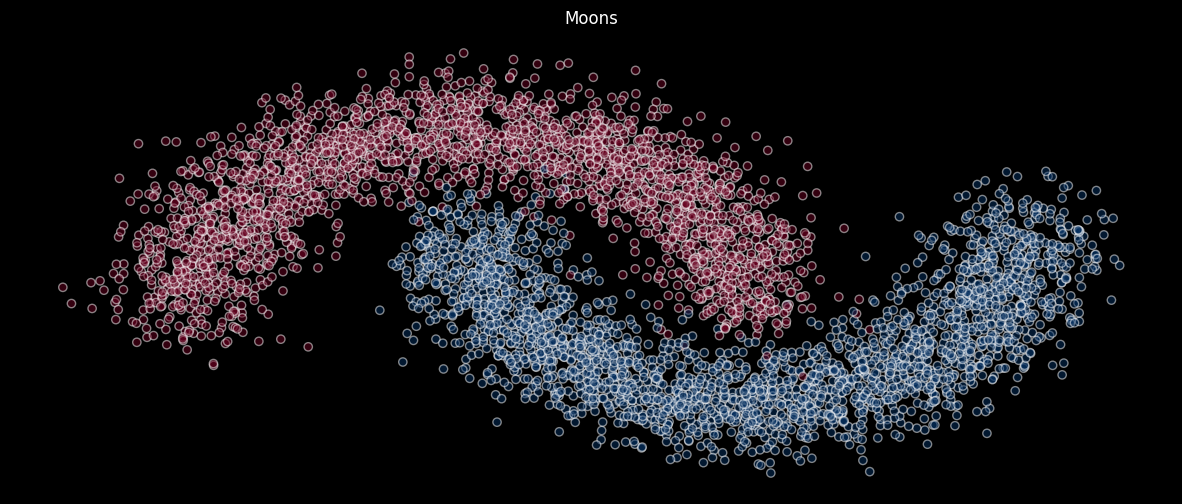

In [6]:
plt.figure(figsize=(15,6))
plt.title("Moons")
plt.scatter(x[:, 0], x[:, 1],
            c = y,
            alpha=.5,
            cmap = "RdBu",
            ec="white"
            )
plt.axis("off")
plt.show()

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 42)

In [8]:
x_train_gpu = torch.from_numpy(x_train).to(torch.float32) # numpy to torch float 32 (по умолчанию float64)
y_train_gpu = torch.from_numpy(y_train).type_as(x_train_gpu)

x_val_gpu = torch.from_numpy(x_val).to(torch.float32)
y_val_gpu = torch.from_numpy(y_val).type_as(x_val_gpu)

In [10]:
type(x_train_gpu)

torch.Tensor

### Подготовка данных к обучению

In [11]:
BATCH = 64
train_dataset = TensorDataset(x_train_gpu, y_train_gpu)
val_dataset = TensorDataset(x_val_gpu, y_val_gpu)

# Создаём загрузчики
train_loader = DataLoader(train_dataset, batch_size=BATCH)
val_loader = DataLoader(val_dataset, batch_size=BATCH)

In [12]:
next(iter(train_loader)) # Вывод данных

[tensor([[ 1.0004,  0.8002],
         [ 0.8939, -0.6853],
         [ 0.8986,  0.2994],
         [ 0.1065,  0.4086],
         [ 0.4683,  0.9134],
         [ 1.7658, -0.3047],
         [-1.2086,  0.6061],
         [ 0.9629,  0.7460],
         [-0.9185,  0.4370],
         [-0.4932,  1.0971],
         [ 0.0297,  0.8338],
         [-0.9087,  0.4381],
         [-0.9307,  0.1575],
         [ 0.9154, -0.5770],
         [ 0.1783,  0.9633],
         [ 1.8527, -0.5560],
         [ 1.1903,  0.2228],
         [ 2.0332,  0.5498],
         [ 0.1604,  1.3143],
         [ 0.2614, -0.1001],
         [-1.0280,  0.1765],
         [ 0.6630,  0.6603],
         [ 0.5437,  0.6328],
         [ 0.8913, -0.5819],
         [-0.2893,  1.0663],
         [ 0.4571, -0.4091],
         [-0.9142,  0.5102],
         [ 2.0027,  0.1656],
         [ 2.0481,  0.1749],
         [ 1.1574, -0.5607],
         [-0.2566,  1.0266],
         [-0.7999,  0.4205],
         [ 0.0514,  0.1397],
         [ 0.7903,  0.6220],
         [ 0.2

In [13]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu" # Для автоматического запуска на видеокарте, если она есть
DEVICE

'cuda'

### Линейная модель обучения в PyTorch
$$ y = xW + b $$

In [17]:
class MyLinearRegression(nn.Module):


  def __init__(self, in_features, out_features):
    '''Инициализация неросетки'''

    super().__init__() # Получаем доступ к методам родительского класса

    self.W = nn.Parameter(torch.randn((in_features, out_features),
                                      requires_grad=True)
    )

    self.b = nn.Parameter(torch.ones(out_features),
                                      requires_grad=True)

  def forward(self, x):
    '''Нейрон'''

    x = x @ self.W
    x += self.b

    return x


#### Обучение

In [18]:
# Подготовка

# 1. Задать модель - nn.Module
my_nn_model = MyLinearRegression(2, 1)

# 2. Задать функцию потерь - nn.NAME_OF_FUNC
loss_function = nn.BCEWithLogitsLoss()

# 3. Задать оптимизатор - torch.optim.NAME_OF_OPTIM
optimizer = torch.optim.SGD(my_nn_model.parameters(), lr=.042)

# Поместить модель и метрику на GPU
my_nn_model = my_nn_model.to(DEVICE)
accuracy = Accuracy('binary').to(DEVICE)

# Создать вспомогательные списки для данных
# н-р, лосс на каждой итераций
losses_train = []
# н-р, общий лосс
total_loss = []
# н-р, accuracy
acc_val = []

# Задать общее количество эпох
MAX_EPOCHS = 100

# Начинаем обучение для каждой эпохи
for epoch in tqdm(range(MAX_EPOCHS)):

  # Для каждой части датасета
  # Один шаг обучения
  for iteration, (x_batch, y_batch) in enumerate(train_loader):

    # Переводим модель в режим обучения
    my_nn_model.train()

    # ОБНУЛЯЕМ градиенты у оптимизатора
    optimizer.zero_grad()

    # Пропускам данные через модель
    outputs = my_nn_model(x_batch.to(DEVICE))

    # Выравняем выходы в одномерный тензор
    outputs = outputs.view(-1)

    # Считаем лосс
    loss = loss_function(outputs, y_batch.to(DEVICE))

    # Делаем шаг в обратном направлении
    loss.backward()

    # Собираем лоссы
    losses_train.append(loss.detach().cpu().numpy().item())

    # Делаем шаг оптимизатора
    optimizer.step()

  # собираем средний лосс для 1 эпохи
  total_loss.append(np.mean(losses_train))

  # Один шаг валидации
  for iteration, (x_batch, y_batch) in enumerate(val_loader):

    # Режим инференса или валидации, тестирования
    my_nn_model.eval()

    # Обязательно добавить
    with torch.no_grad():

      # Пропускаме данные, выравниваем в одномерный тензор, считаем лоссы
      outputs = my_nn_model(x_batch.to(DEVICE))
      outputs = outputs.view(-1)
      loss = loss_function(outputs, y_batch.to(DEVICE))

      # Считаем вероятности
      proba = torch.sigmoid(outputs)

      # Считаем метрику
      batch_acc = accuracy(proba, y_batch.to(torch.int32).to(DEVICE))
      acc_val.append(batch_acc.detach().cpu().numpy().item())

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
acc = np.mean(acc_val)
print(f"Посчитанная Accuracy для нашей модели:{acc:.2%}")

Посчитанная Accuracy для нашей модели:86.38%


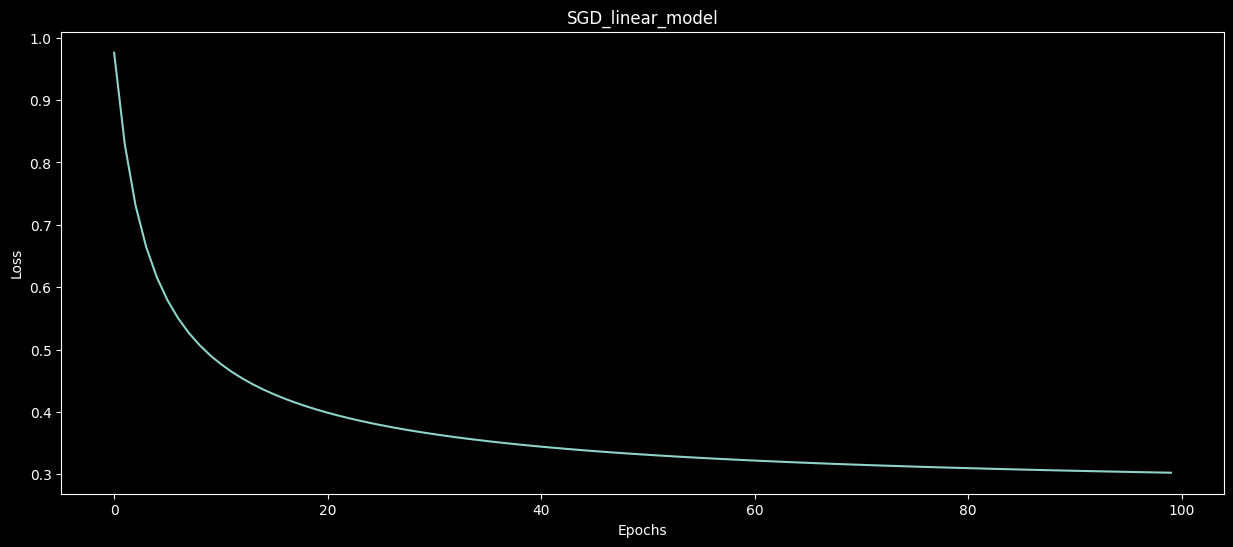

In [23]:
# Отображаем график лоссов
plt.figure(figsize=(15,6))
plt.plot(range(len(total_loss)),
        total_loss,
        linestyle="-"
         )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD_linear_model")
plt.show()

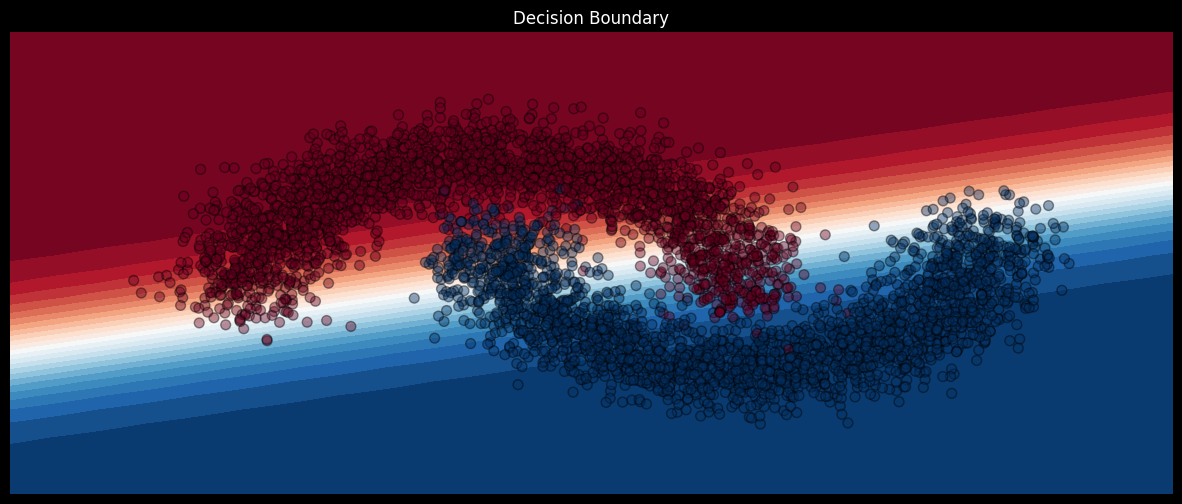

In [33]:
plot_decision_boundary(my_nn_model.to("cpu"))

In [35]:
with torch.no_grad():
  torch.cuda.empty_cache()

In [ ]:
acc = np.mean(acc_val)
print(f"Посчитанная Accuracy для нашей модели:{acc:.2%}")

Посчитанная Accuracy для нашей модели:86.38%


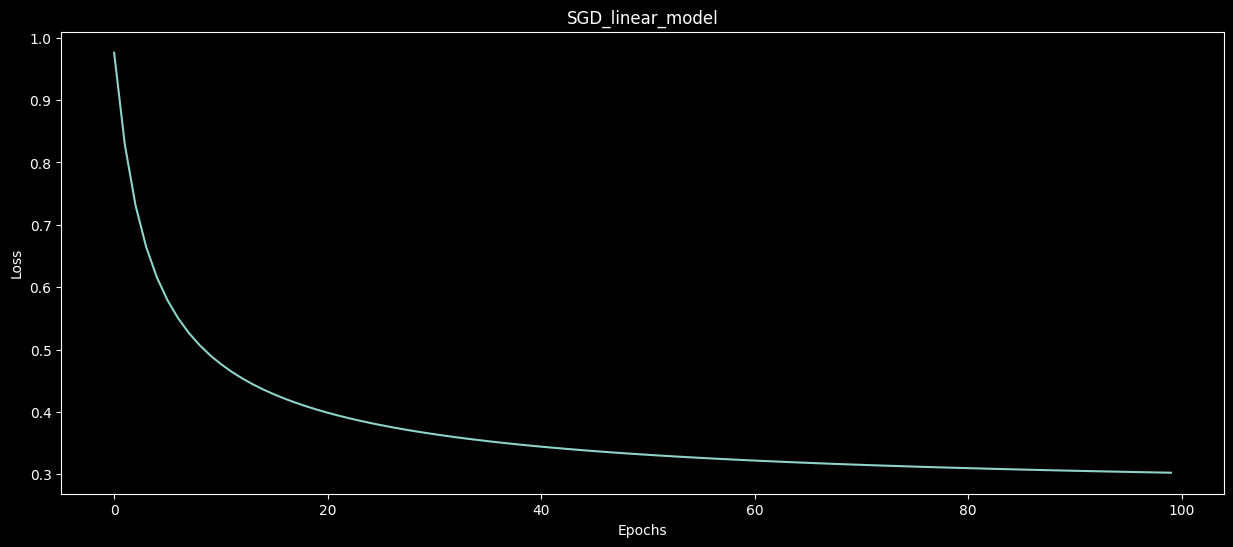

In [ ]:
# Отображаем график лоссов
plt.figure(figsize=(15,6))
plt.plot(range(len(total_loss)),
        total_loss,
        linestyle="-"
         )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD_linear_model")
plt.show()

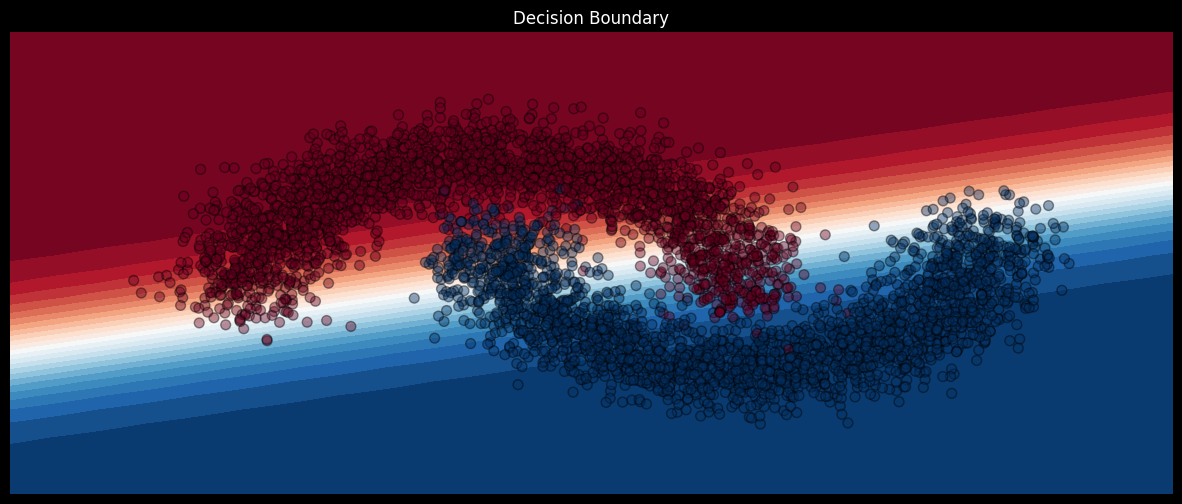

In [ ]:
plot_decision_boundary(my_nn_model.to("cpu"))

In [ ]:
with torch.no_grad():
  torch.cuda.empty_cache()

### Полносвязная нейронная сеть

In [38]:
# Как НЕ НАДО работать с pytorch
activation = nn.ReLU()
model = nn.Sequential(
    nn.Linear(2,4),
    nn.Dropout(p=.5),
    activation,
    nn.Linear(4,1)
)

In [39]:
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=4, out_features=1, bias=True)
)

In [49]:
class my_NN(nn.Module):


  def __init__(self, in_features, out_features):
    '''Инициализация неросетки'''

    super().__init__() # Получаем доступ к методам родительского класса

    self.lin_linear_1 = self.make_layer(in_features, in_features * 4)
    self.lin_linear_2 = self.make_layer(in_features * 4, in_features * 2)
    self.lin_linear_3 = self.make_layer(in_features * 2, out_features)

    self.relu = F.relu

  def make_layer(self, in_f, out_f):
    return nn.Linear(in_f, out_f)

  def forward(self, x):
    '''Слои сетки'''

    x = self.lin_linear_1(x)
    x = self.relu(x)
    x = self.lin_linear_2(x)
    x = self.relu(x)
    x = self.lin_linear_3(x)

    return x

#### Обучение

In [50]:
# 1. Задать модель - nn.Module
my_nn_model = my_NN(2, 1)

# 2. Задать функцию потерь - nn.NAME_OF_FUNC
loss_function = nn.BCEWithLogitsLoss()

# 3. Задать оптимизатор - torch.optim.NAME_OF_OPTIM
optimizer = torch.optim.Adam(my_nn_model.parameters(), lr=.042)

In [52]:
list(my_nn_model.parameters())

[Parameter containing:
 tensor([[ 0.4846,  0.2088],
         [ 0.2488,  0.2978],
         [-0.3627, -0.0866],
         [-0.1555,  0.1230],
         [-0.2077, -0.0526],
         [-0.4855,  0.6958],
         [-0.2160,  0.6388],
         [ 0.2152, -0.3757]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4380,  0.4161, -0.0702,  0.6795,  0.3491,  0.0561,  0.3827, -0.4815],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2825, -0.0326, -0.1439, -0.2267,  0.0787, -0.3295,  0.2350,  0.0187],
         [ 0.1123, -0.1483, -0.0490, -0.1026, -0.0313, -0.0341, -0.3119, -0.1824],
         [ 0.0750,  0.3484,  0.1140, -0.1652, -0.1374, -0.0245,  0.1132, -0.1145],
         [-0.2823,  0.2744, -0.1086,  0.0973,  0.0062,  0.1329,  0.2566,  0.1048]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0685, -0.0452,  0.2822,  0.0819], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2351,  0.4391, -0.1513, -0.0833]], requires_grad=True),
 Parameter containing:

In [53]:
# Поместить модель и метрику на GPU
my_nn_model = my_nn_model.to(DEVICE)
accuracy = Accuracy('binary').to(DEVICE)

# Создать вспомогательные списки для данных
# н-р, лосс на каждой итераций
losses_train = []
# н-р, общий лосс
total_loss = []
# н-р, accuracy
acc_val = []

# Задать общее количество эпох
MAX_EPOCHS = 100

# Начинаем обучение для каждой эпохи
for epoch in tqdm(range(MAX_EPOCHS)):

  # Для каждой части датасета
  # Один шаг обучения
  for iteration, (x_batch, y_batch) in enumerate(train_loader):

    # Переводим модель в режим обучения
    my_nn_model.train()

    # ОБНУЛЯЕМ градиенты у оптимизатора
    optimizer.zero_grad()

    # Пропускам данные через модель
    outputs = my_nn_model(x_batch.to(DEVICE))

    # Выравняем выходы в одномерный тензор
    outputs = outputs.view(-1)

    # Считаем лосс
    loss = loss_function(outputs, y_batch.to(DEVICE))

    # Делаем шаг в обратном направлении
    loss.backward()

    # Собираем лоссы
    losses_train.append(loss.detach().cpu().numpy().item())

    # Делаем шаг оптимизатора
    optimizer.step()

  # собираем средний лосс для 1 эпохи
  total_loss.append(np.mean(losses_train))

  # Один шаг валидации
  for iteration, (x_batch, y_batch) in enumerate(val_loader):

    # Режим инференса или валидации, тестирования
    my_nn_model.eval()

    # Обязательно добавить
    with torch.no_grad():

      # Пропускаме данные, выравниваем в одномерный тензор, считаем лоссы
      outputs = my_nn_model(x_batch.to(DEVICE))
      outputs = outputs.view(-1)
      loss = loss_function(outputs, y_batch.to(DEVICE))

      # Считаем вероятности
      proba = torch.sigmoid(outputs)

      # Считаем метрику
      batch_acc = accuracy(proba, y_batch.to(torch.int32).to(DEVICE))
      acc_val.append(batch_acc.detach().cpu().numpy().item())

  0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
acc = np.mean(acc_val)
print(f"Посчитанная Accuracy для нашей модели:{acc:.2%}")

Посчитанная Accuracy для нашей модели:98.58%


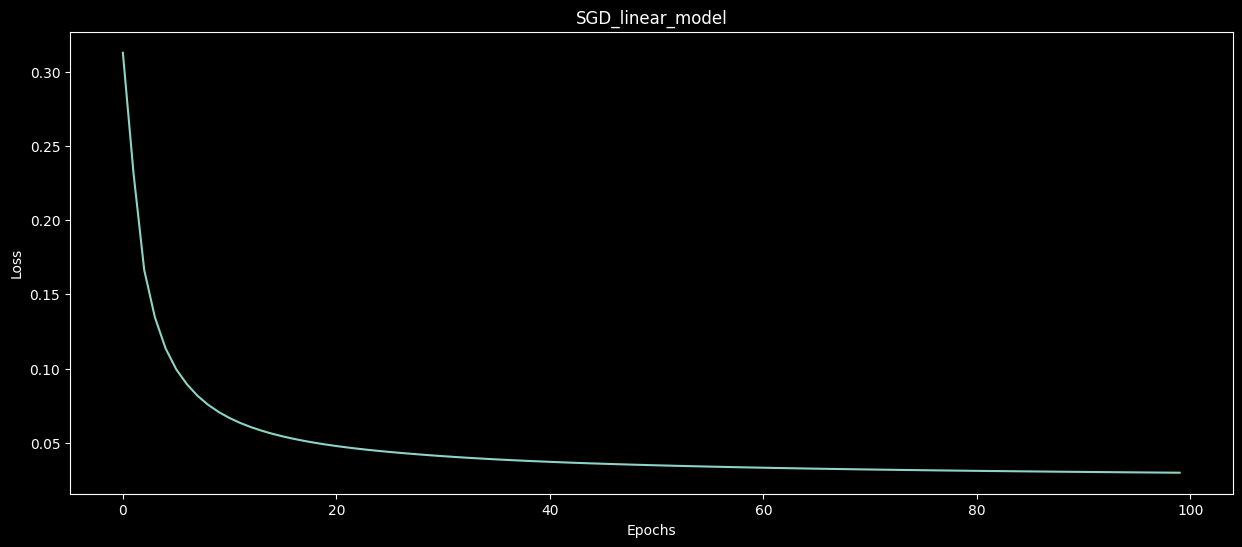

In [55]:
# Отображаем график лоссов
plt.figure(figsize=(15,6))
plt.plot(range(len(total_loss)),
        total_loss,
        linestyle="-"
         )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD_linear_model")
plt.show()

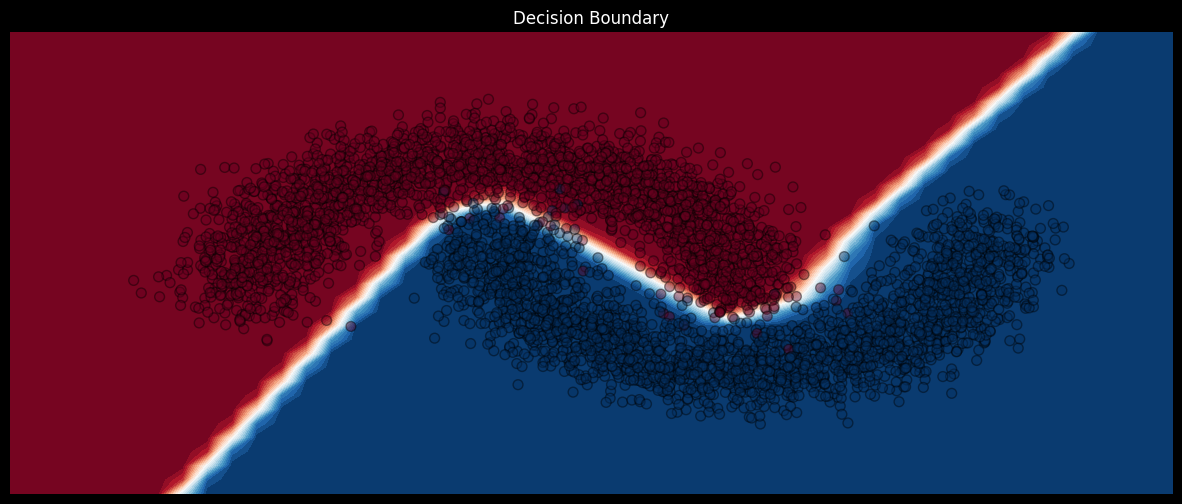

In [56]:
plot_decision_boundary(my_nn_model.to("cpu"))

In [57]:
with torch.no_grad():
  torch.cuda.empty_cache()

Полезные ссылки:   


- [Deep learning School](https://mipt.ru/science/labs/innovation/projects/deep_learning_school) - Школа глубокого обучения (Deep Learning School) — ФПМИ МФТИ;  
- [pyTorch tutorial](https://pytorch.org/tutorials/) - Официальный туториал `pyTorch`;  
- [Kaggle competition - Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer) - соревнование `Kaggle` по распознаванию цифр и [pyTorch Mnist tutorial](https://pythonguides.com/pytorch-mnist/);   
- [Kaggel competition - Titanic](https://www.kaggle.com/c/titanic) - соревнование по классификации - подсказка - количество признаков == количеству входов в первом слое;  
- [pyTorch metrics](https://torchmetrics.readthedocs.io/en/stable/) - вспомогательная библиотека для подсчета метрик;  
- [pyTorch Lightning](https://www.pytorchlightning.ai/tutorials) - вспомогательная библиотка, которая помогает писать меньше кода для `pyTorch`
- [ООП](https://proproprogs.ru/python_oop) - немного про ООП доступно
